# Getting Started with Strym

In [1]:
import strym
from strym import strymread
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import urllib.request

/home/ivory/anaconda3/envs/dbn/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading BokehJS ...

In [2]:
dbcfile = '/home/ivory/VersionControl/Jmscslgroup/strym/examples/newToyotacode.dbc'

In [3]:
%%time
folder = "/home/ivory/CyverseData/JmscslgroupData/PandaData/2020_08_13/"
file= "2020-08-13-13-26-45_2T3Y1RFV8KC014025_CAN_Messages.csv"
r =strymread(csvfile=folder + file, dbcfile = dbcfile, createdb = True, verbose=False)

UNIQUE constraint failed: RAW_CAN.Clock, RAW_CAN.Bus, RAW_CAN.MessageID
CPU times: user 21.6 s, sys: 1.02 s, total: 22.6 s
Wall time: 16.7 s


In [4]:
r.dataframe

,Time,Bus,MessageID,Message,MessageLength
Clock,,,,,
2020-08-13 20:26:46.108451843,1.597350e+09,2,835,0000430000000091,8.0
2020-08-13 20:26:46.108451843,1.597350e+09,0,835,0000430000000091,8.0
2020-08-13 20:26:46.108451843,1.597350e+09,2,705,08ff86ff8cbc009f,8.0
2020-08-13 20:26:46.108451843,1.597350e+09,0,705,08ff86ff8cbc009f,8.0
2020-08-13 20:26:46.108793974,1.597350e+09,2,452,0383260838007f38,8.0
...,...,...,...,...,...
2020-08-13 20:37:17.848950863,1.597351e+09,1,441,de7ffc00000ffc26,8.0
2020-08-13 20:37:17.849765062,1.597351e+09,1,442,de7ffc00000ffc27,8.0
2020-08-13 20:37:17.849765062,1.597351e+09,2,401,e2ff8830646400fb,8.0


In [5]:
r.dataframe.head()

,Time,Bus,MessageID,Message,MessageLength
Clock,,,,,
2020-08-13 20:26:46.108451843,1.597350e+09,2,835,0000430000000091,8.0
2020-08-13 20:26:46.108451843,1.597350e+09,0,835,0000430000000091,8.0
2020-08-13 20:26:46.108451843,1.597350e+09,2,705,08ff86ff8cbc009f,8.0
2020-08-13 20:26:46.108451843,1.597350e+09,0,705,08ff86ff8cbc009f,8.0
2020-08-13 20:26:46.108793974,1.597350e+09,2,452,0383260838007f38,8.0


## Get the count of all messages

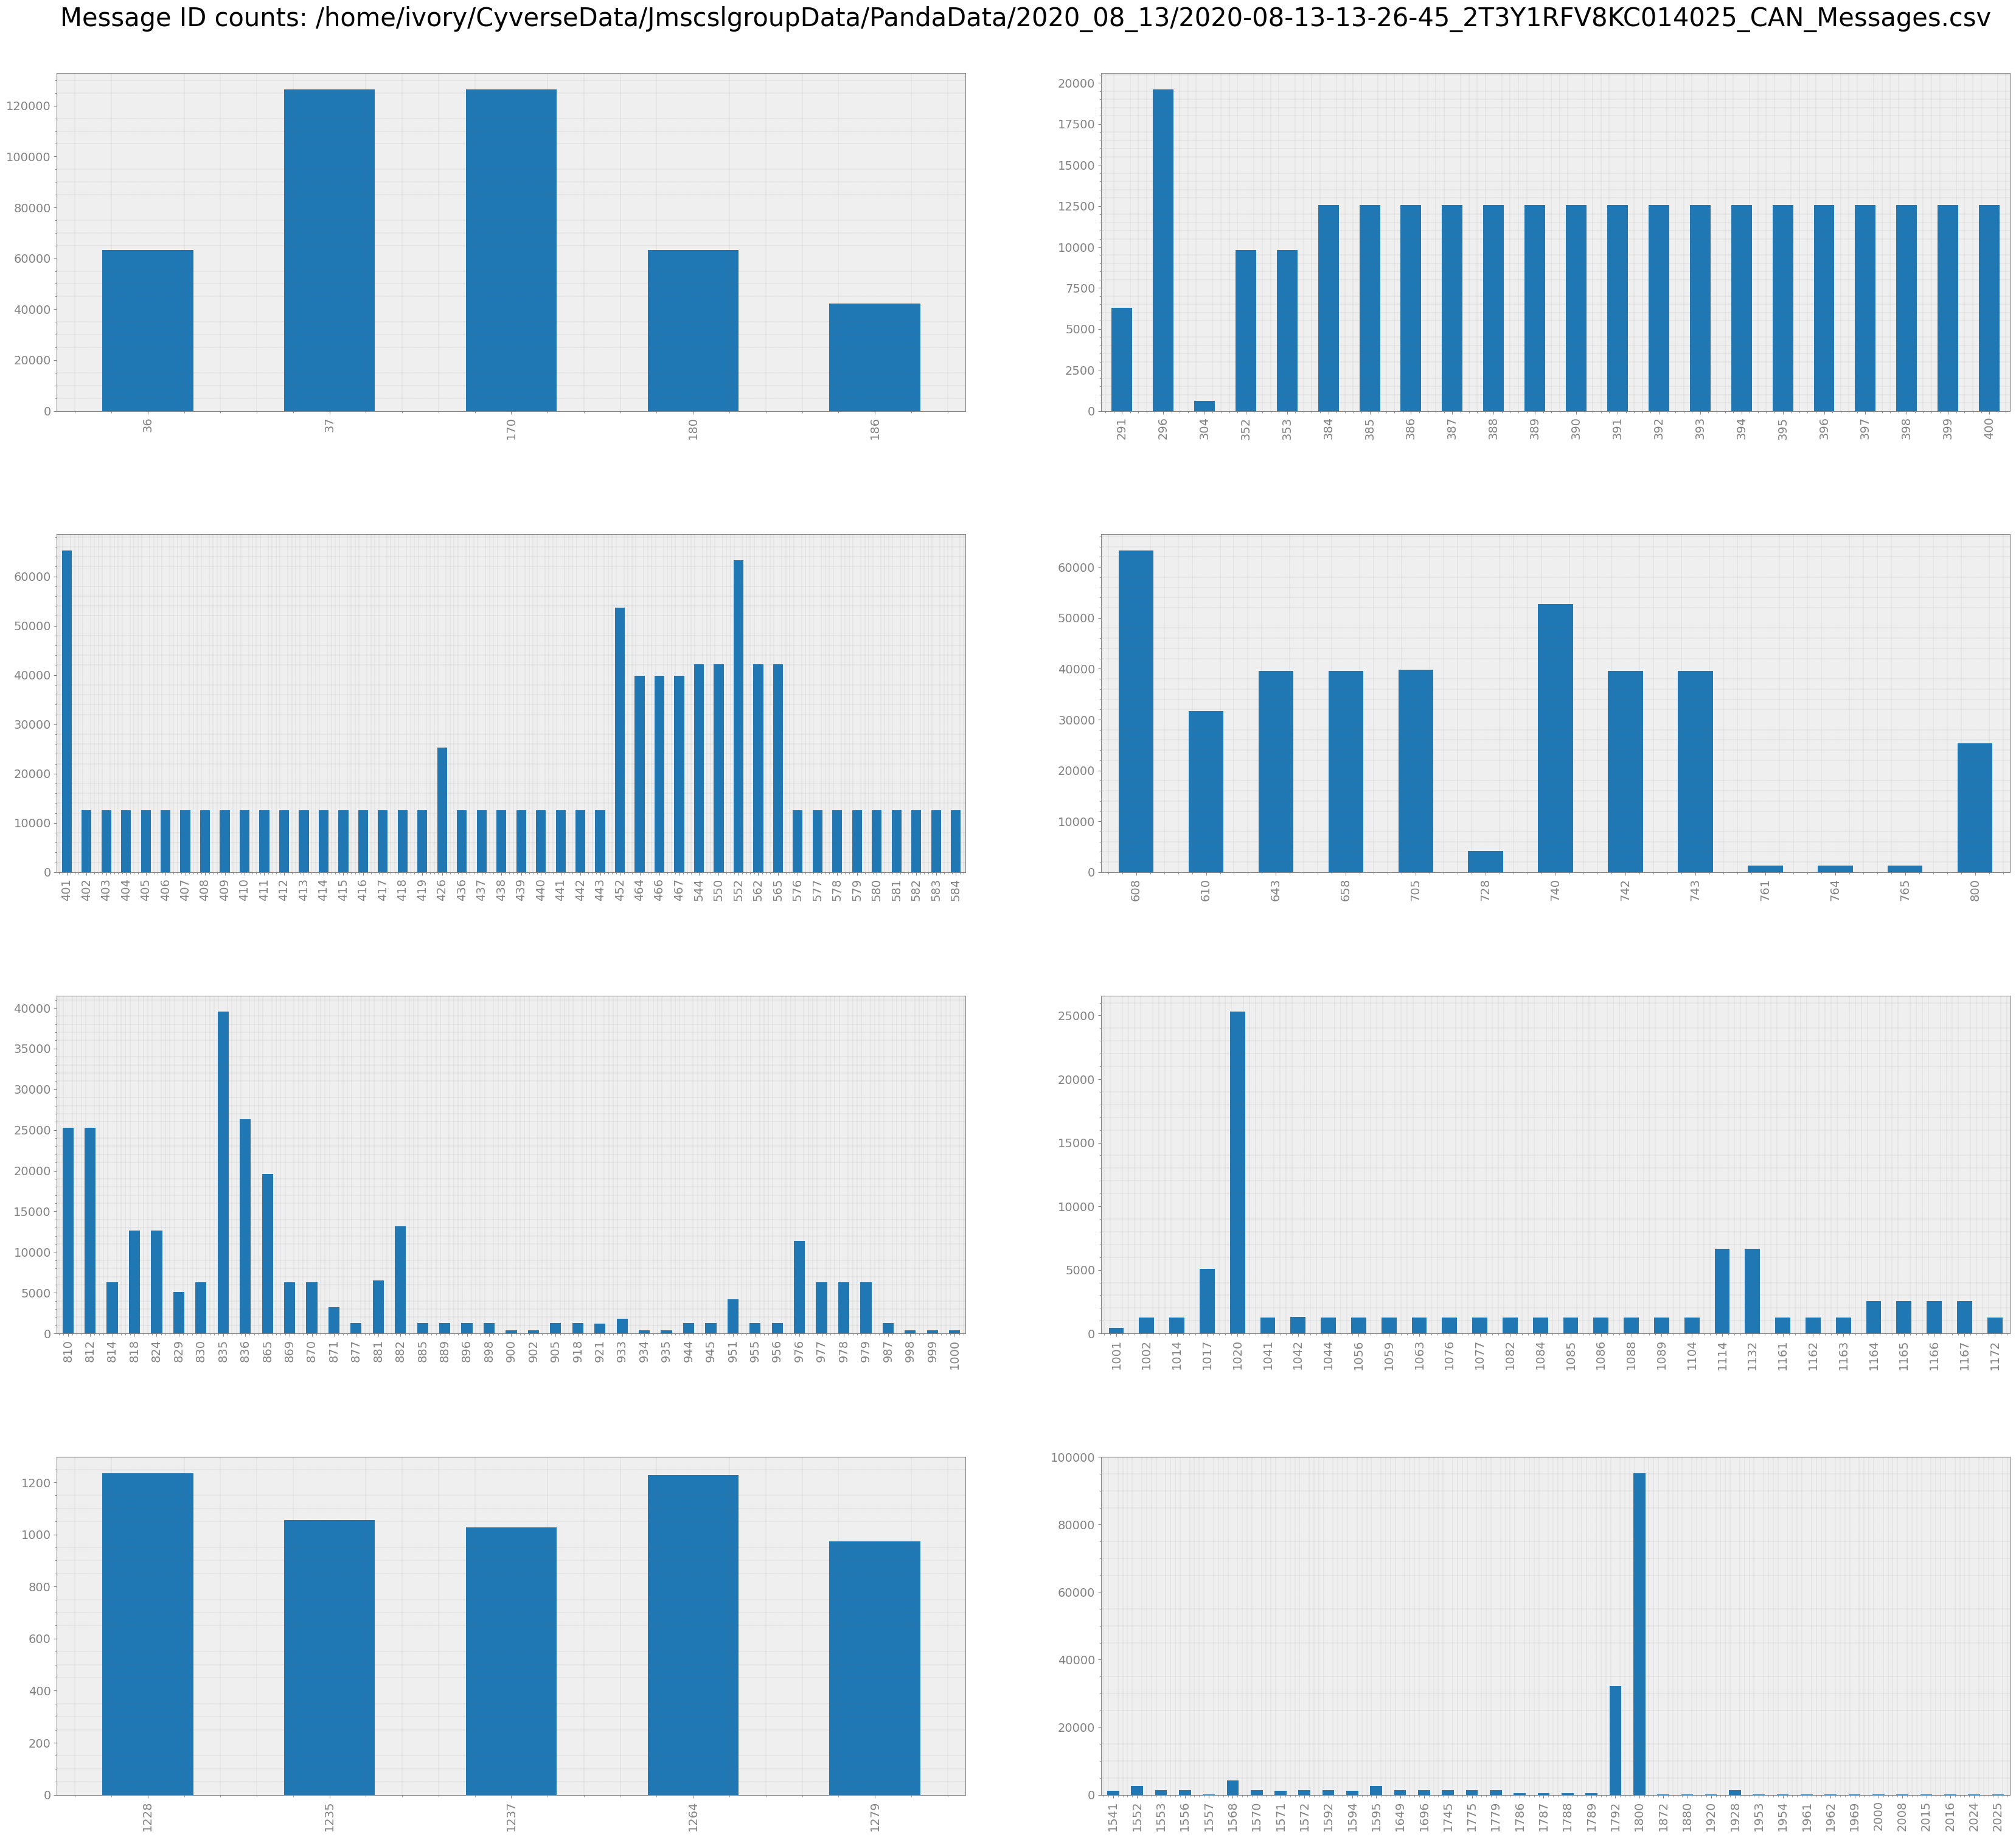

,MessageID,Counts_Bus_0,Counts_Bus_1,Counts_Bus_2,TotalCount
36,36,31626,0,31626,63252
37,37,63252,0,63252,126504
170,170,63252,0,63252,126504
180,180,31626,0,31626,63252
186,186,21084,0,21084,42168
...,...,...,...,...,...
2008,2008,48,0,48,96
2015,2015,24,0,24,48
2016,2016,3,0,3,6
2024,2024,26,0,26,52


In [6]:
count = r.count(plot = True)
count

## Reading a signal from a particular message ID

In [7]:
msg180 = r.get_ts(msg=180, signal=1)

In [8]:
msg180

,Time,Message,Bus
Clock,,,
2020-08-13 20:26:46.109022141,1.597350e+09,0.0,2
2020-08-13 20:26:46.109022141,1.597350e+09,0.0,0
2020-08-13 20:26:46.111299038,1.597350e+09,0.0,2
2020-08-13 20:26:46.111299038,1.597350e+09,0.0,0
2020-08-13 20:26:46.113986015,1.597350e+09,0.0,2
...,...,...,...
2020-08-13 20:37:17.794481993,1.597351e+09,0.0,0
2020-08-13 20:37:17.814836025,1.597351e+09,0.0,2
2020-08-13 20:37:17.815034866,1.597351e+09,0.0,0


## Plotting the signal

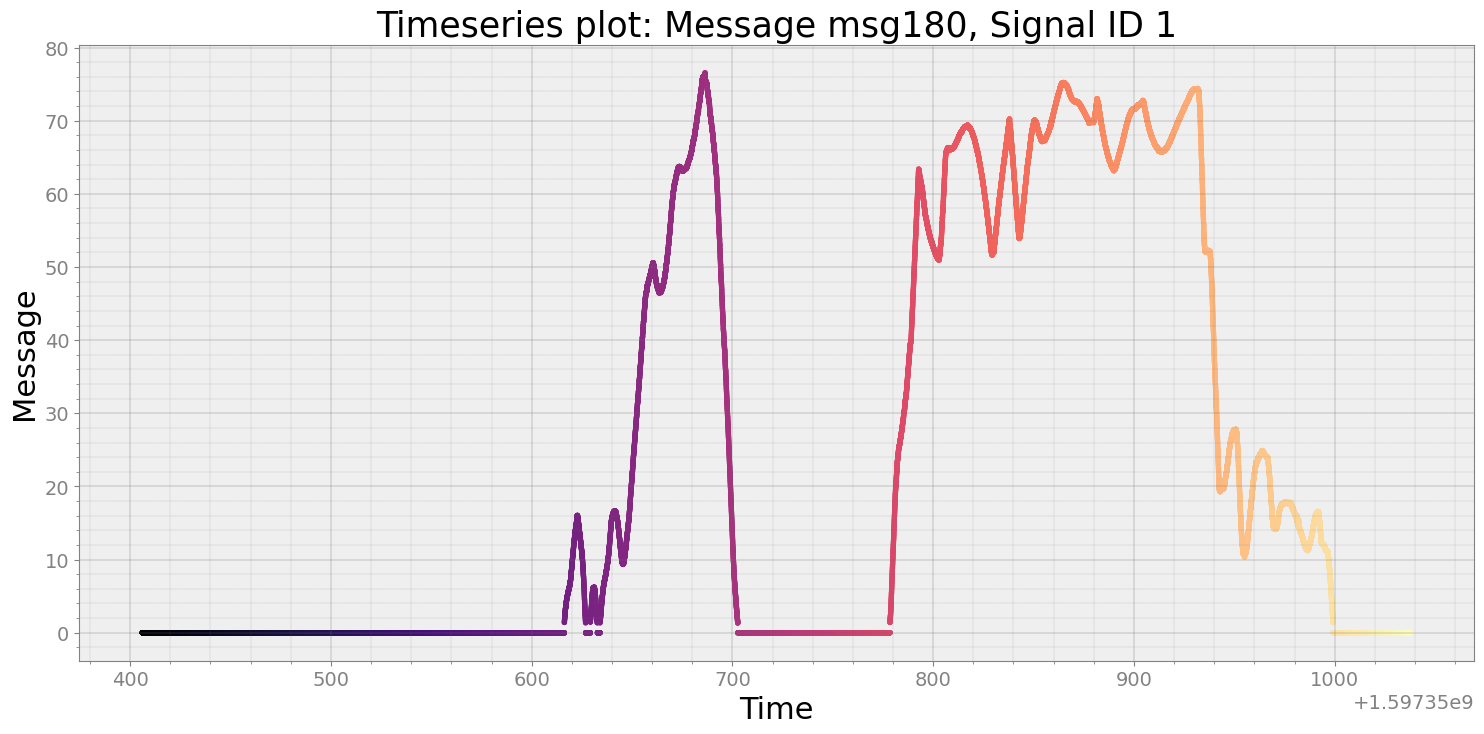

In [9]:
strymread.plt_ts(msg180, title="Message msg180, Signal ID 1")

## Quality Check of Data Rate of Particular Message

Analyzing Timestamp and Data Rate of Timeseries
Interquartile Range of Rate for Timeseries is 1.3397845087453533 


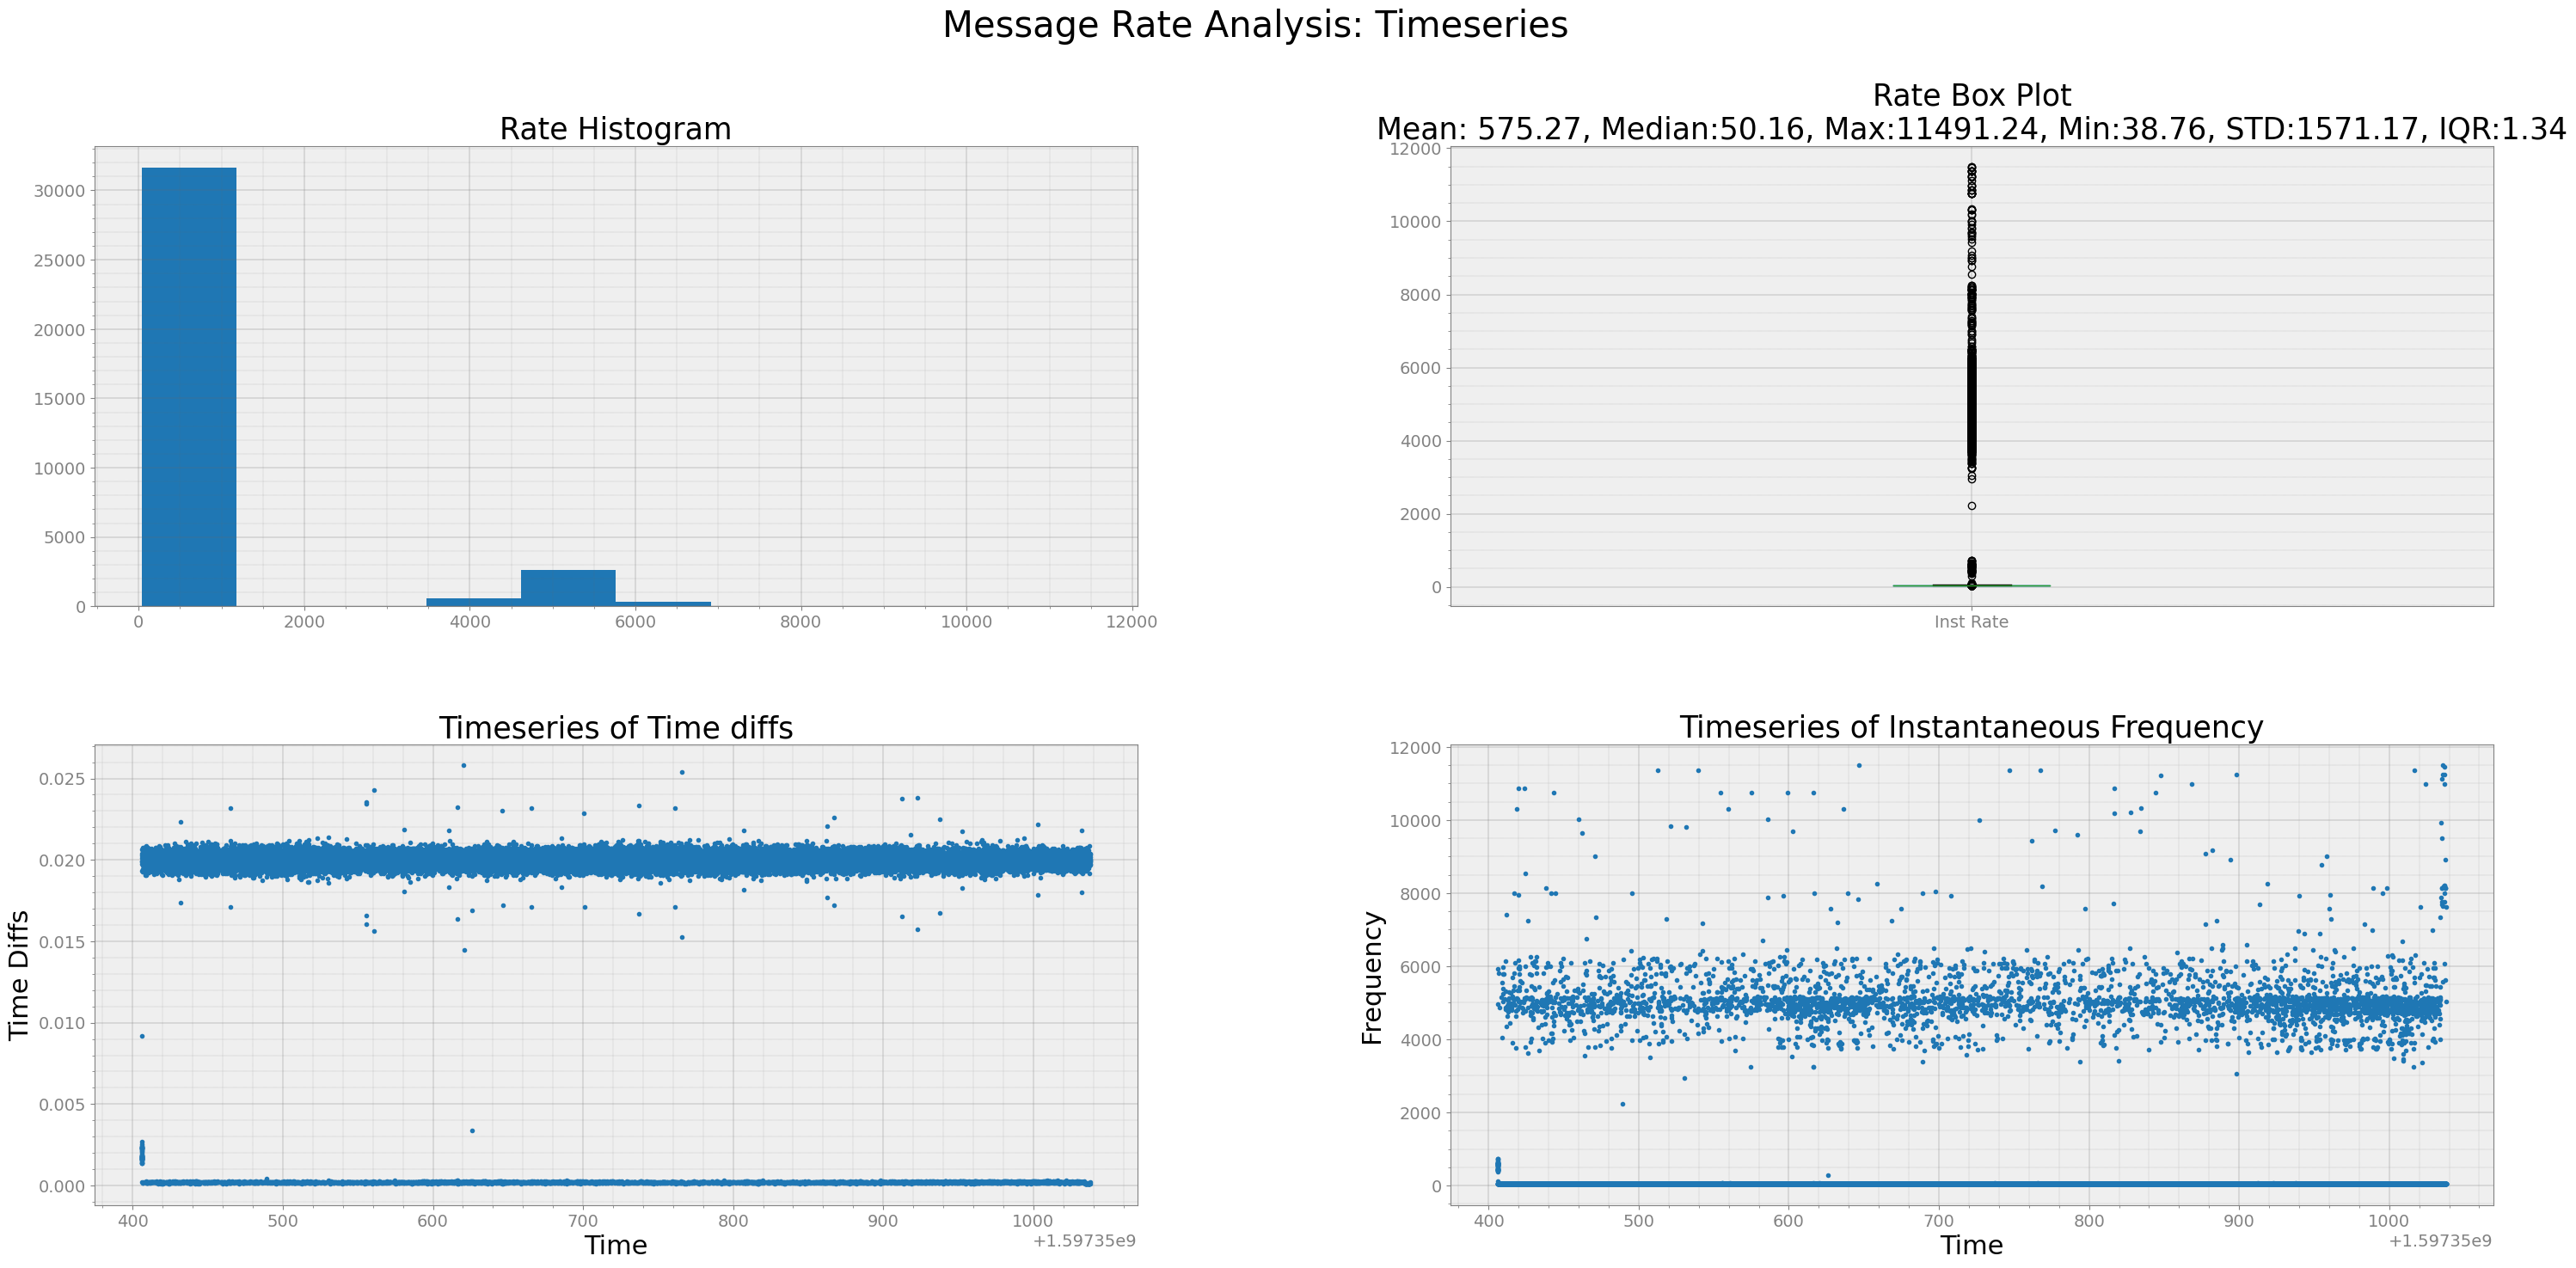

In [15]:
ts_speed = r.speed()
strymread.ranalyze(msg180)

From above plots, we can see that most message were received within sampling time of 0.02s or 50 Hz.

Analyzing Timestamp and Data Rate of Timeseries
Interquartile Range of Rate for Timeseries is 0.0005959978496221652 


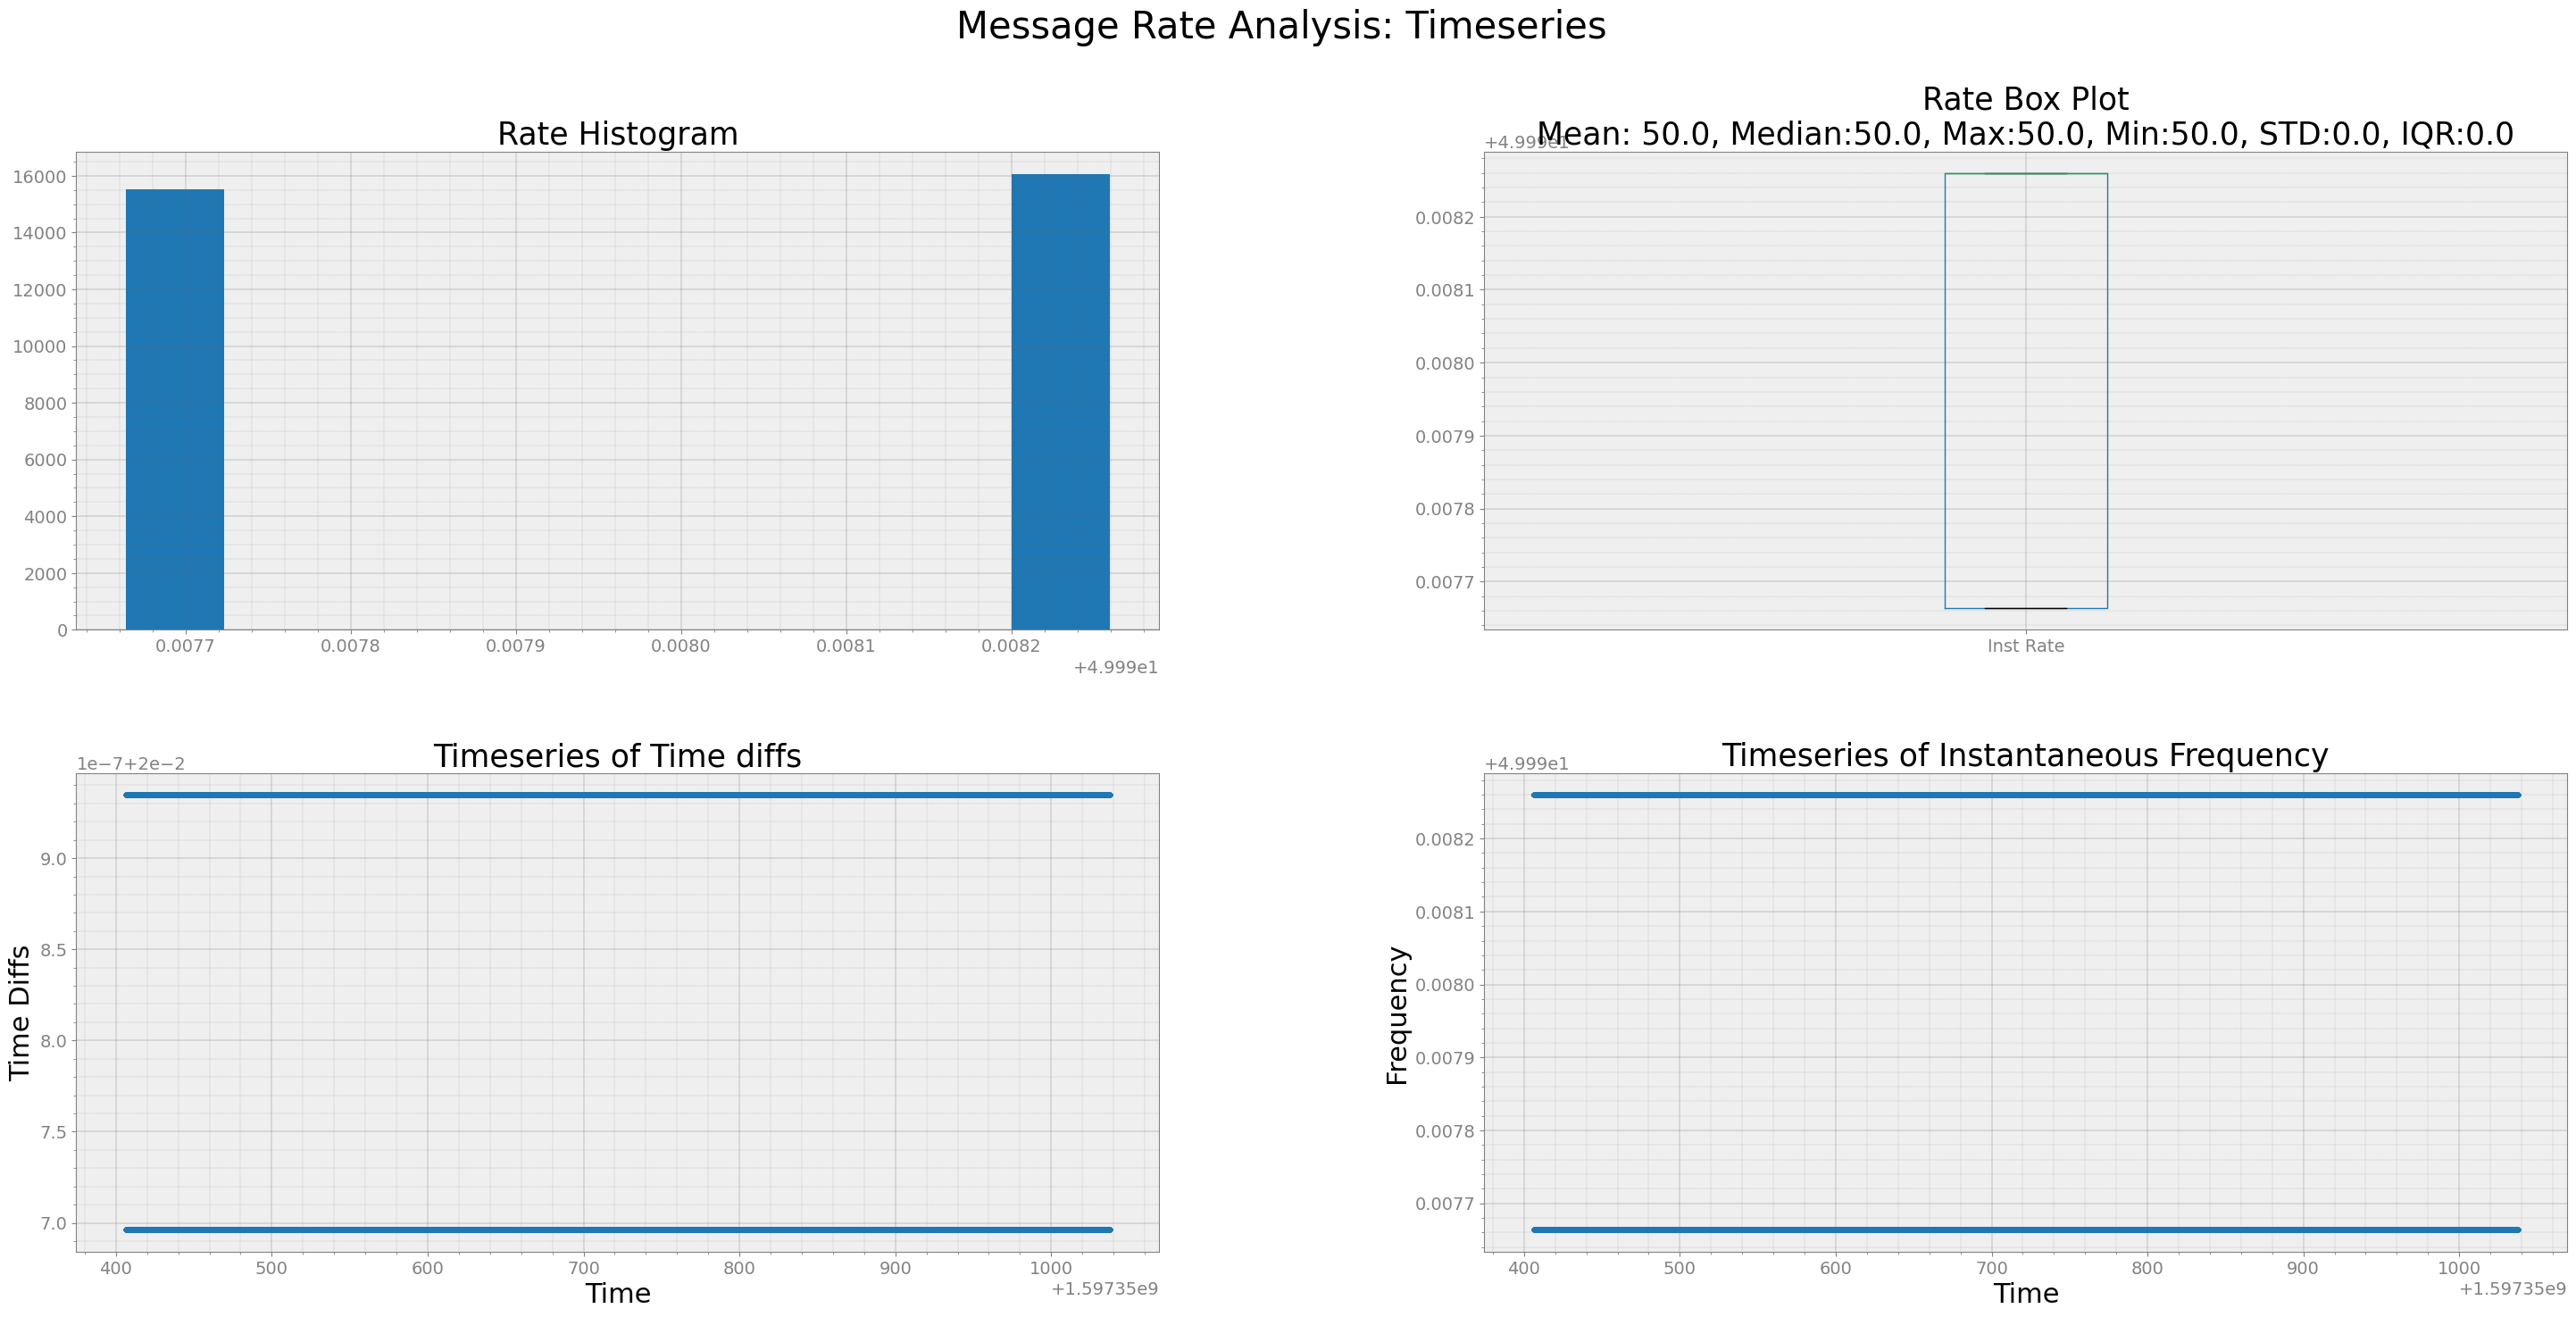

In [12]:
resampled180 = strymread.resample(msg180, rate = 50)
strymread.ranalyze(resampled180)

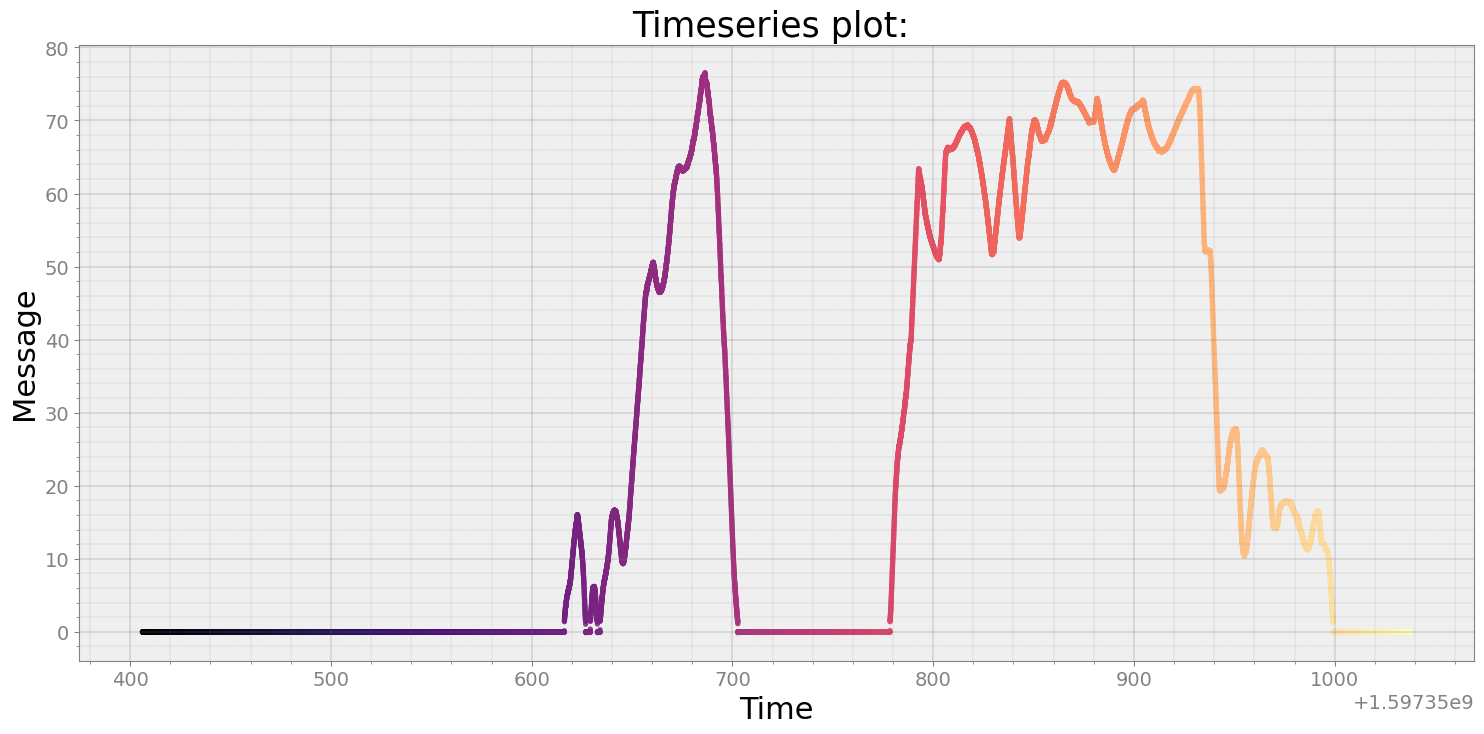

In [13]:
strymread.plt_ts(resampled180)